**Project Proposal: Factors in the Development of Heart Disease**

Riley McNair, Lucas Wong, Yusen Wu, Kevin Zhu

**Introduction**

Heart disease is one of North America's leading causes of death in adults. Heart disease can lead to increased risks of heart failure and attacks and sometimes death. Many factors contribute to people's increased likeliness of getting heart disease. **Question**: Which of the following factors, cholesterol, resting blood pressure, max heart rate, and age, are significant indicators of heart disease in each gender? Each of these variables has been linked to heart disease in people. The CDC states that high cholesterol levels and blood pressure are linked to the cause of heart disease (CDC 2022). Exercise and age also play a vital role in the development of heart disease within individuals (Rodgers et al. 2019). 



Load packages we are using within this proposal.

In [3]:
# load packages
library(tidyverse) # needed for many functions used for data analysis, such as read_csv(), select(), etc.
library(repr)
library(tidymodels) 
library(infer) #needed for bootstraping and editing the data and plots

Read in the data from UC Irvine's Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease via a zip file.

In [4]:
# read in dataset from web
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
download.file(url, "cleveland_data.zip")
unzip("cleveland_data.zip")
cleveland_original <- read_csv("processed.cleveland.data",
                               col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                        "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                               show_col_types = FALSE)

# preview first 5 rows of the dataframe
head(cleveland_original, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Filter the categories we will be using. This includes age, sex, resting blood pressure, max heart rate, cholesteral levels, and the presence of heart disease. We have tidied the num category (which originally had other numerical values), which represents the presence of heart disease, 0 = no heart disease, 1 = heart disease present. 

In [11]:

# select for columns we'll use
cleveland <- select(cleveland_original, age, sex, trestbps, chol, thalach, num)

# convert num column to binary (0 = no heart disease; 1 = presence of heart disease)
cleveland <- cleveland |>
    mutate(num = as.factor(ifelse(num != 0, 1, 0)))

# preview first 5 rows of new dataframe
head(cleveland, 5)

age,sex,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
67,1,160,286,108,1
67,1,120,229,129,1
37,1,130,250,187,0
41,0,130,204,172,0


Visualizing preliminary relationships between data:

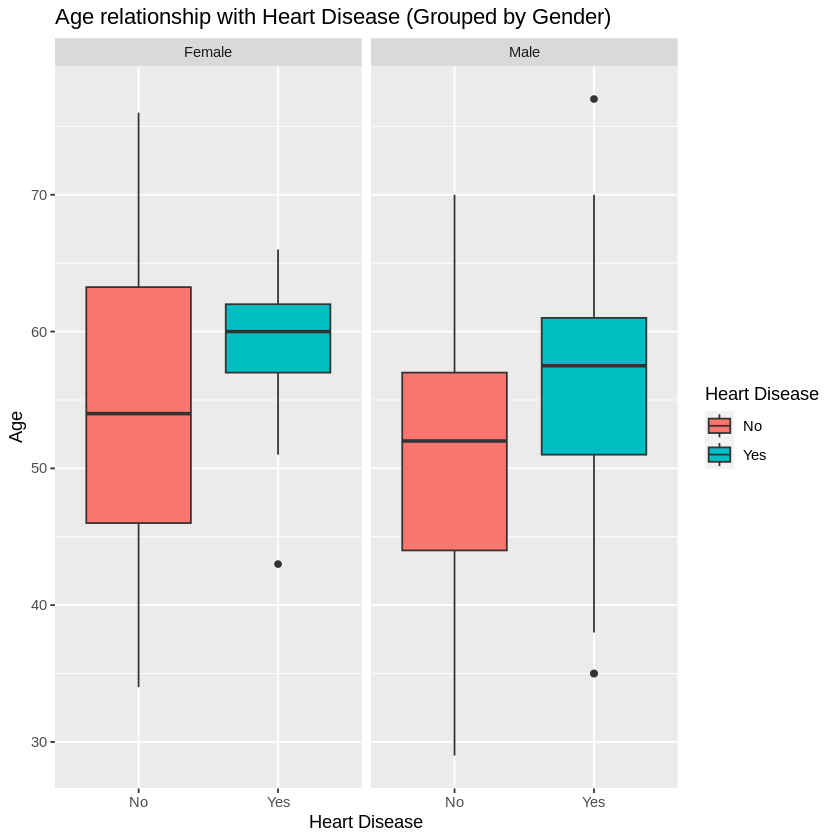

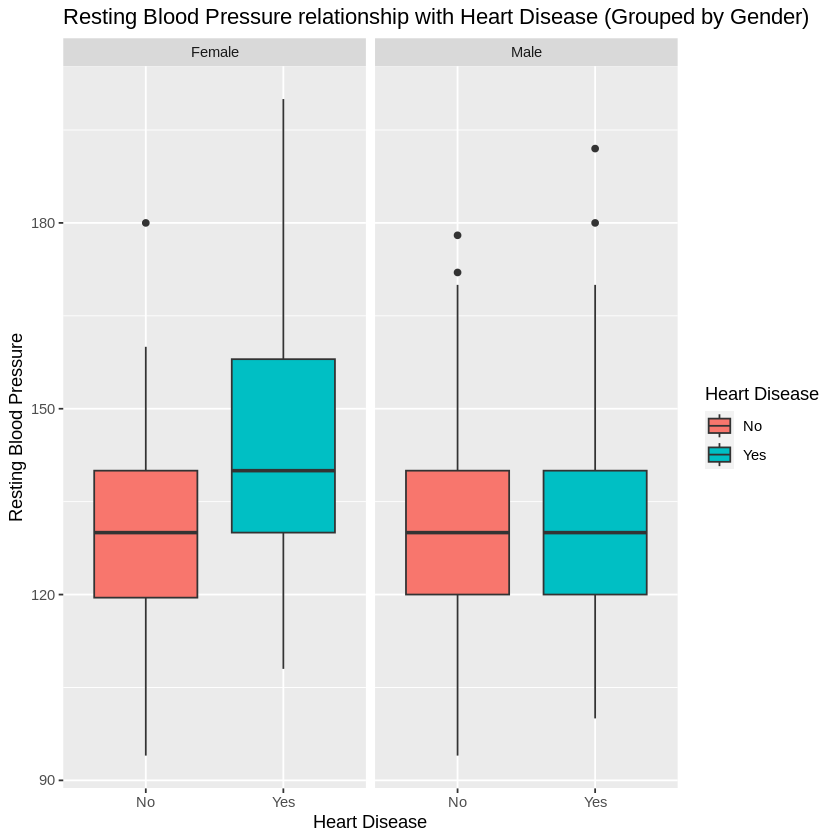

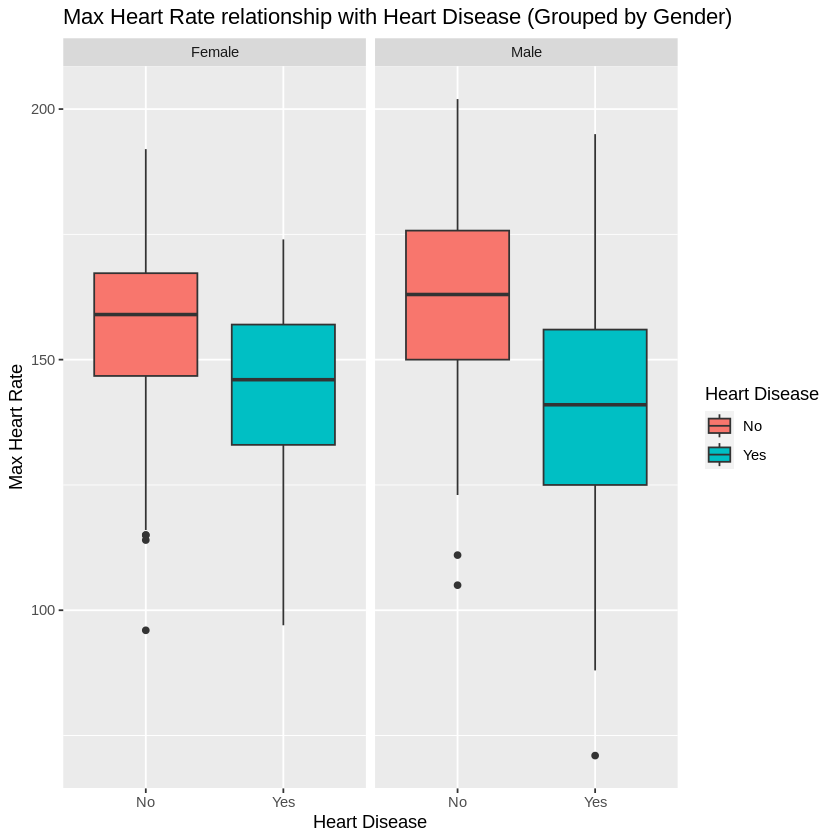

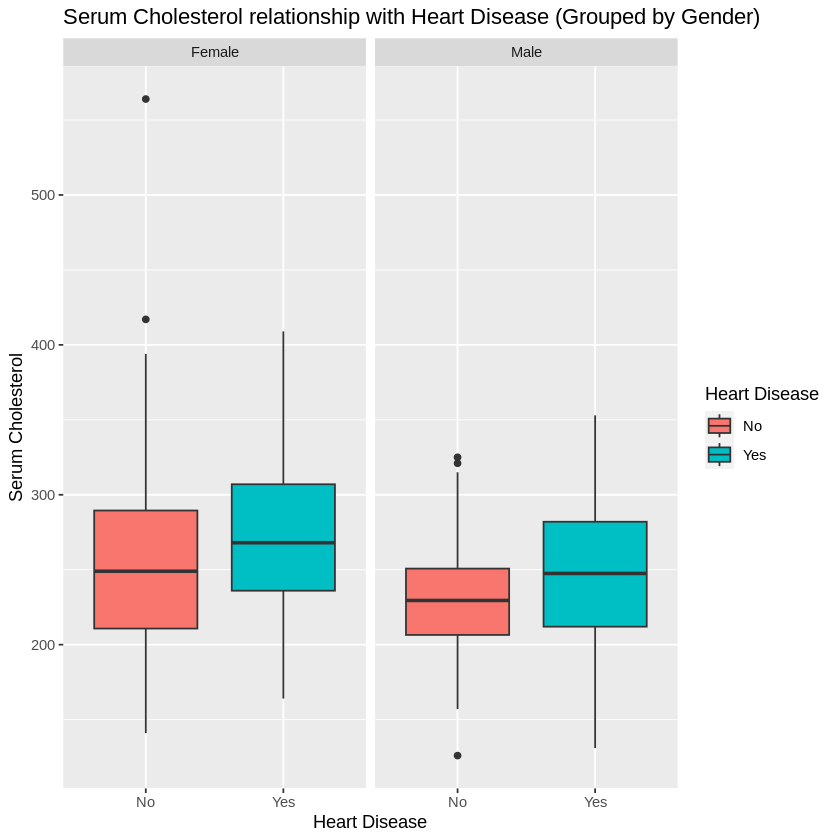

In [42]:
labelled_data <- mutate(cleveland, sex = ifelse(sex == 1, "Male", "Female")) |>
                    mutate(num = ifelse(num == 1, "Yes", "No"))
age_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=age, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Age") + 
            ggtitle("Age relationship with Heart Disease (Grouped by Gender)")

bp_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=trestbps, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Resting Blood Pressure") + 
            ggtitle("Resting Blood Pressure relationship with Heart Disease (Grouped by Gender)")

maxhr_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=thalach, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Max Heart Rate") + 
            ggtitle("Max Heart Rate relationship with Heart Disease (Grouped by Gender)")

chol_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=chol, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Serum Cholesterol") + 
            ggtitle("Serum Cholesterol relationship with Heart Disease (Grouped by Gender)")
age_hd
bp_hd
maxhr_hd
chol_hd


From the boxplots above, We can see that the median age for heart disease appears to be higher than the median age for no disease for men and women, however the values for non-heart disease female patients has a very high variance. Serum cholesterol appears to be higher on average in patients with heart disease irrespective of gender. Patients with heart disease also seem to experience lower maximum heart rates achieved during exercise regardless of gender. Resting blood pressure seems to have no relationship with heart disease in males, however female patients with heart disease seem to experience higher resting blood pressures.

**Methods**

Out of 5% significance level 

**Expectations and Significance**

Within this research, we expect to find a correlation between the variables we are testing for and an increased risk of heart disease. Specifically, we are testing to see if age, blood pressure, heart rate, and cholesterol impact developing heart disease in individuals. These findings could help those in the medical field better determine which characteristics could predict heart diseases, indicating specific characteristics that would increase their chances of contracting heart disease among individuals. Further research could be done surrounding which types of heart diseases are most commonly seen among people with certain variables such as age and cholesterol. 

**Reference**

Center for Disease Control and Prevention, Heart Disease and Stroke, National Center for Chronic Disease Prevention and Health Promotion, 2022 Sep 8; https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=The%20Nation's%20Risk%20Factors%20and,unhealthy%20diet%2C%20and%20physical%20inactivity. 

Rodgers JL, Jones J, Bolleddu SI, Vanthenapalli S, Rodgers LE, Shah K, Karia K, Panguluri SK. Cardiovascular Risks Associated with Gender and Aging. J Cardiovasc Dev Dis. 2019 Apr 27;6(2):19. doi: 10.3390/jcdd6020019. PMID: 31035613; PMCID: PMC6616540.